In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction
from sklearn import model_selection
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [9]:
data = pd.read_csv("spam_csv.csv")

In [10]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [11]:
data = data.drop(columns=['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'])
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Text(0, 0.5, '')

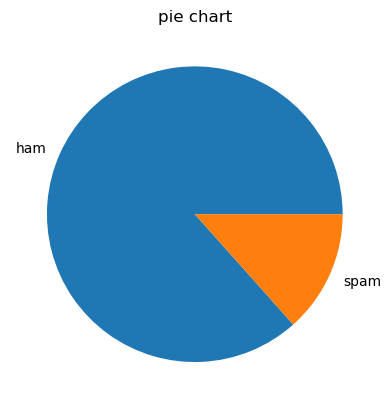

In [12]:
target = pd.value_counts(data['v1'])
target.plot(kind='pie')
plt.title('pie chart')
plt.ylabel('')

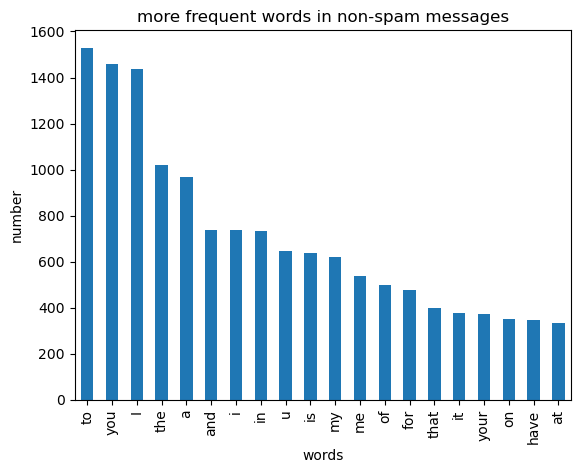

In [13]:
ham_words = Counter(' '.join(data[data['v1']=='ham']['v2']).split()).most_common(20) 
df_ham_words = pd.DataFrame.from_dict(ham_words) 
df_ham_words = df_ham_words.rename(columns={0: 'words in non‐spam',1:'count'}) 
df_ham_words.plot.bar(x= 'words in non‐spam',legend = False)
y_pos = np.arange(len(df_ham_words['words in non‐spam'])) 
plt.xticks(y_pos, df_ham_words['words in non‐spam']) 
plt.title('more frequent words in non‐spam messages') 
plt.xlabel('words') 
plt.ylabel('number') 
plt.show()

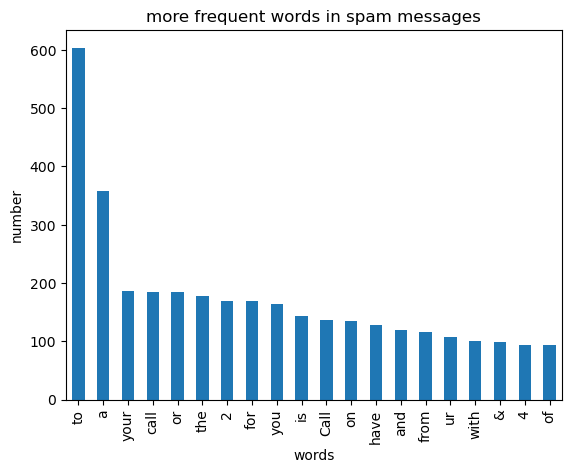

In [14]:
spam_words = Counter(' '.join(data[data['v1']=='spam']['v2']).split()).most_common(20) 
df_spam_words = pd.DataFrame.from_dict(spam_words) 
df_spam_words = df_spam_words.rename(columns={0: 'words in spam',1:'count'}) 
df_spam_words.plot.bar(x= 'words in spam',legend = False)
y_pos = np.arange(len(df_spam_words['words in spam'])) 
plt.xticks(y_pos, df_spam_words['words in spam']) 
plt.title('more frequent words in spam messages') 
plt.xlabel('words') 
plt.ylabel('number') 
plt.show()

In [15]:
tokenizer = feature_extraction.text.CountVectorizer(stop_words = 'english')
X = tokenizer.fit_transform(data['v2'])
y = pd.get_dummies(data['v1'])['spam']

In [16]:
data['v1'] = data['v1'].map({'spam':1, 'ham':0})
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, data['v1'], test_size = 0.33)

In [17]:
X_train.shape

(3733, 8357)

In [18]:
X_test.shape

(1839, 8357)

In [19]:
alpha_range = np.arange(0.1, 20, 0.1)
train_score = []
test_score = []
test_recall = []
test_precision = []

for i in alpha_range:
    model = MultinomialNB(alpha = i)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_train)
    train_score.append(metrics.accuracy_score(y_train, y_predict))
    y_predict = model.predict(X_test)
    test_score.append(metrics.accuracy_score(y_test, y_predict))
    test_recall.append(metrics.recall_score(y_test, y_predict))
    test_precision.append(metrics.precision_score(y_test, y_predict))

In [20]:
matrix = np.matrix(np.c_[alpha_range, train_score, test_score, test_recall, test_precision])
models = pd.DataFrame(data = matrix, columns = ['alpha', 'train accuracy', 'test accuracy', 'test recall', 'test precision'])
models

,alpha,train accuracy,test accuracy,test recall,test precision
0,0.1,0.997053,0.975530,0.967480,0.865455
1,0.2,0.996785,0.978793,0.971545,0.881919
2,0.3,0.996518,0.978249,0.971545,0.878676
3,0.4,0.996785,0.976074,0.963415,0.871324
4,0.5,0.996250,0.977162,0.963415,0.877778
...,...,...,...,...,...
194,19.5,0.973212,0.967917,0.760163,1.000000
195,19.6,0.973212,0.967917,0.760163,1.000000
196,19.7,0.973212,0.967917,0.760163,1.000000
197,19.8,0.972944,0.967374,0.756098,1.000000


In [21]:
# best_index = models['test precision'].idxmax()
best_value = models['test precision'].max()
# print(best_index)
print(best_value)
best_index = models['test accuracy'].idxmax()
print(best_index)
best_index = models[models['test precision']==1]['test accuracy'].idxmax()
print(best_index)

1.0
26
149


In [22]:
model = MultinomialNB(alpha = alpha_range[best_index])
model.fit(X_train, y_train)

MultinomialNB(alpha=15.0)

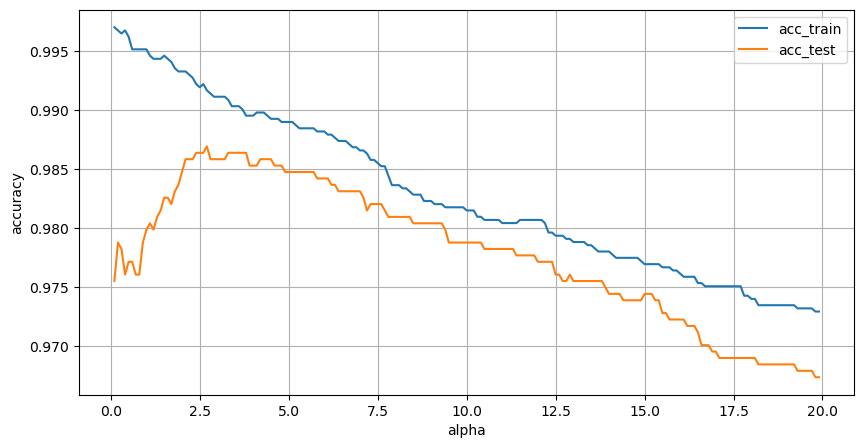

In [23]:
model = MultinomialNB(alpha = alpha_range[best_index]) 
model.fit(X_train, y_train) 

plt.figure(figsize = [10,5])
plt.plot(alpha_range,train_score)
plt.plot(alpha_range,test_score)
plt.grid("on")
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.legend(["acc_train","acc_test"])

In [24]:
confusion_matrix1 = confusion_matrix(y_test, model.predict(X_test))
pd.DataFrame(data = confusion_matrix1, columns = ['predicted ham', 'predicted spam'], index = ['actual ham', 'actual spam'])

,predicted ham,predicted spam
actual ham,1593,0
actual spam,47,199


In [25]:
y_pred_pr = model.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve (y_test, y_pred_pr)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

0.9698401032974547


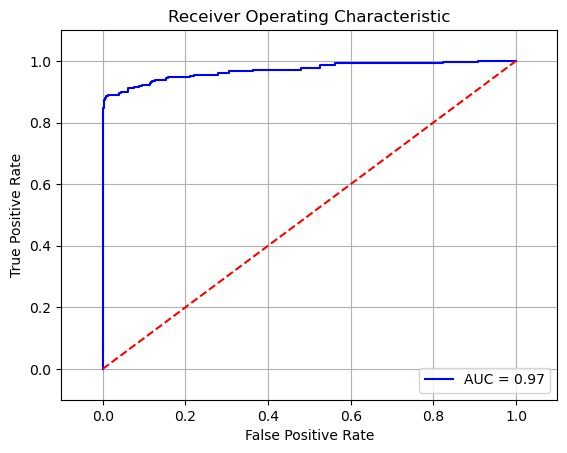

In [26]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid('on')
plt.show()

In [27]:
c_range = np.arange(0.01, 3, 0.1) 
train_score = []
test_score = []
test_recall = []
test_precision = []


for i in c_range:
    model = SVC(C = i) 
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_train)
    train_score.append(metrics.accuracy_score(y_train, y_predict))
    y_predict = model.predict(X_test)
    test_score.append(metrics.accuracy_score(y_test, y_predict))
    test_recall.append(metrics.recall_score(y_test, y_predict))
    test_precision.append(metrics.precision_score(y_test, y_predict))

D:\Program Files\Anaconda3\envs\AI\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
matrix  =  np.matrix(np.c_[c_range,  train_score,  test_score,  test_recall, test_precision])
models = pd.DataFrame(data = matrix,  columns =  ['C',  'train accuracy', 'test accuracy', 'test recall', 'test precision'])
models

,C,train accuracy,test accuracy,test recall,test precision
0,0.01,0.865792,0.866232,0.000000,0.000000
1,0.11,0.866327,0.866775,0.004065,1.000000
2,0.21,0.911063,0.889070,0.170732,1.000000
3,0.31,0.965979,0.926591,0.451220,1.000000
4,0.41,0.984731,0.953779,0.654472,1.000000
5,0.51,0.988481,0.961936,0.715447,1.000000
6,0.61,0.991696,0.965742,0.743902,1.000000
7,0.71,0.993571,0.969005,0.768293,1.000000
8,0.81,0.993839,0.972811,0.796748,1.000000
9,0.91,0.994374,0.974443,0.808943,1.000000


In [29]:
best_value = models['test precision'].max()
# print(best_index)
print(best_value)
best_index = models['test accuracy'].idxmax()
print(best_index)
best_index = models[models['test precision']==best_value]['test accuracy'].idxmax()
print(best_index)

1.0
22
17


In [30]:
model = SVC(C = c_range[best_index],probability = True) 
model.fit(X_train, y_train)

SVC(C=1.7100000000000002, probability=True)

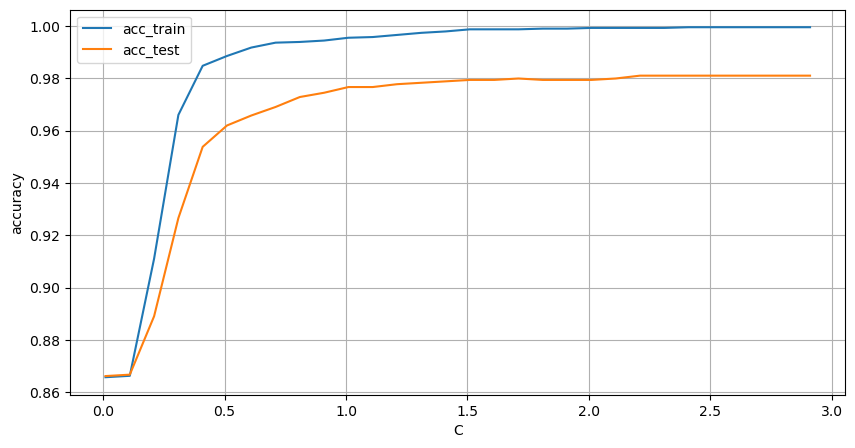

In [31]:
model = SVC(C = c_range[best_index],probability = True) 
model.fit(X_train, y_train) 

plt.figure(figsize = [10,5])
plt.plot(c_range,train_score)
plt.plot(c_range,test_score)
plt.grid("on")
plt.xlabel('C')
plt.ylabel('accuracy')
plt.legend(["acc_train","acc_test"])

In [32]:
confusion_matrix1 = confusion_matrix(y_test, model.predict(X_test)) 
pd.DataFrame(data  =  confusion_matrix1,  columns  =  ['predicted  ham',
'predicted spam'], index = ['actual ham', 'actual spam'])

,predicted ham,predicted spam
actual ham,1593,0
actual spam,37,209


In [33]:
y_pred_pr = model.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve (y_test, y_pred_pr)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

0.9941614482058192


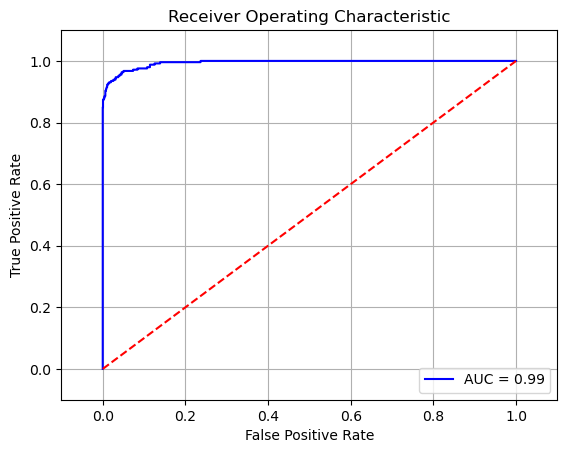

In [34]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid('on')
plt.show()